----
# Data Loading
----

### Notebook Summary:

In this notebook, I will perform data pre-processing on Microsoft stock data sourced from yfinance.
### Key Steps:

- **Data Extraction:** Loading the stock data for Microsoft from yfinance
- **Data Pre-Processing:** Setting Index to Date column
- **Data Visualisations:** To gather insights into the stock data
- **Data Storage:** Save dataframe, ready for import on data cleaning

## Set Up
---

In [67]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

import yfinance as yf

## Loading data from yFinance
---

In [68]:
## Looking at Microsoft stock prices
ticker = "MSFT"
msft = yf.Ticker(ticker)

In [69]:
# Looking at data from the past 5 years
msft_df = msft.history(period = '5y')

### Data Overview

|           | Description                                           |
|-----------|-------------------------------------------------------|
| Date      | Trading Day Date                                      |
| Open      | Open price of Microsoft Stock at start of trading day |
| Close     | Close price of Microsoft Stock at end of trading day  |
| Adj Close | Close price adjusted for dividends and stock splits   |
| High      | Highest price reached during the day                  |
| Low       | Lowest price reached during the trading day           |
| Volume    | Number of shares traded during the day                |

To ignore dividends and splits in this project.

In [70]:
# Overview of data
msft_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-12 00:00:00-04:00,131.667405,132.211832,130.731347,131.352203,27010000,0.0,0.0
2019-09-13 00:00:00-04:00,131.600570,131.868011,130.444847,131.161209,23363100,0.0,0.0
2019-09-16 00:00:00-04:00,129.738001,130.568977,129.575628,130.215576,16731400,0.0,0.0
2019-09-17 00:00:00-04:00,130.817320,131.352201,130.311077,131.228027,17814200,0.0,0.0
2019-09-18 00:00:00-04:00,131.199380,132.450624,130.406604,132.307358,23982100,0.0,0.0


In [71]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-09-12 00:00:00-04:00 to 2024-09-11 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [72]:
msft_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,271.980747,274.691814,269.162189,272.057846,2.873709e+07,0.009921,0.0
std,81.703821,82.061748,81.149248,81.657654,1.260739e+07,0.078815,0.0
min,128.897450,130.253775,127.245045,128.610916,8.989200e+06,0.000000,0.0
25%,210.744997,213.301978,208.732296,210.989357,2.078100e+07,0.000000,0.0
50%,261.861152,264.935395,259.400049,263.120560,2.562380e+07,0.000000,0.0
75%,326.009906,328.518131,322.078938,325.402588,3.307658e+07,0.000000,0.0
max,466.159796,467.507368,463.624357,466.718781,9.701270e+07,0.750000,0.0


## Formatting index (Date)
------

In [73]:
# Checking to see if index is datetime index
msft_df.index

DatetimeIndex(['2019-09-12 00:00:00-04:00', '2019-09-13 00:00:00-04:00',
               '2019-09-16 00:00:00-04:00', '2019-09-17 00:00:00-04:00',
               '2019-09-18 00:00:00-04:00', '2019-09-19 00:00:00-04:00',
               '2019-09-20 00:00:00-04:00', '2019-09-23 00:00:00-04:00',
               '2019-09-24 00:00:00-04:00', '2019-09-25 00:00:00-04:00',
               ...
               '2024-08-28 00:00:00-04:00', '2024-08-29 00:00:00-04:00',
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1258, freq=None)

In [74]:
msft_df.index

DatetimeIndex(['2019-09-12 00:00:00-04:00', '2019-09-13 00:00:00-04:00',
               '2019-09-16 00:00:00-04:00', '2019-09-17 00:00:00-04:00',
               '2019-09-18 00:00:00-04:00', '2019-09-19 00:00:00-04:00',
               '2019-09-20 00:00:00-04:00', '2019-09-23 00:00:00-04:00',
               '2019-09-24 00:00:00-04:00', '2019-09-25 00:00:00-04:00',
               ...
               '2024-08-28 00:00:00-04:00', '2024-08-29 00:00:00-04:00',
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1258, freq=None)

In [75]:
# Removing timestamp from date
msft_df.index = msft_df.index.date

# Resetting index to be datetime index            
msft_df.index = pd.to_datetime(msft_df.index)

In [76]:
msft_df.index

DatetimeIndex(['2019-09-12', '2019-09-13', '2019-09-16', '2019-09-17',
               '2019-09-18', '2019-09-19', '2019-09-20', '2019-09-23',
               '2019-09-24', '2019-09-25',
               ...
               '2024-08-28', '2024-08-29', '2024-08-30', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-09',
               '2024-09-10', '2024-09-11'],
              dtype='datetime64[ns]', length=1258, freq=None)

In [81]:
msft_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-09-12,131.667405,132.211832,130.731347,131.352203,27010000,0.0,0.0
2019-09-13,131.600570,131.868011,130.444847,131.161209,23363100,0.0,0.0
2019-09-16,129.738001,130.568977,129.575628,130.215576,16731400,0.0,0.0
2019-09-17,130.817320,131.352201,130.311077,131.228027,17814200,0.0,0.0
2019-09-18,131.199380,132.450624,130.406604,132.307358,23982100,0.0,0.0


## Data Visualisation
-----

In [83]:
# Ignoring Dividends and Stock Splits
to_plot = ['Open','Close','High', 'Low']

In [85]:
# add lines for each column
fig = px.line(msft_df, x=msft_df.index, y=to_plot)

# axis labels and title
fig.update_layout(
    yaxis_title='Price', 
    legend_title="", 
    title='Daily Stock Prices: Open, High, Low, Close from 2019 to 2024'
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)


----
**Plot Description:**

The graph displays the daily open, close, high, and low prices of the stock over the past 5 years.

All four price metrics show a general upward trend, indicating overall growth in the stock's value. However, the graph also shows significant variations and jagged lines, suggesting daily price fluctuations. These varations will make it challenging to forecast future stock prices.

Noticeable drop in March 2020 due to COVID-19, markets began to raect to the pandemic and we saw severe market declines due to lockdowns and economic uncertainty explaining the drop we see in March 2020.

See a peak in January 2023, this could be due to Microsoft's partnership with OpenAI causing stock prices to increase.

## Volume

In [87]:
year_vol = msft_df[['Volume']].resample('Y').sum()

In [88]:
year_vol

,Volume
2019-12-31,1701548400
2020-12-31,9527876900
2021-12-31,6555279200
2022-12-31,7836049700
2023-12-31,6918889900
2024-12-31,3611619400


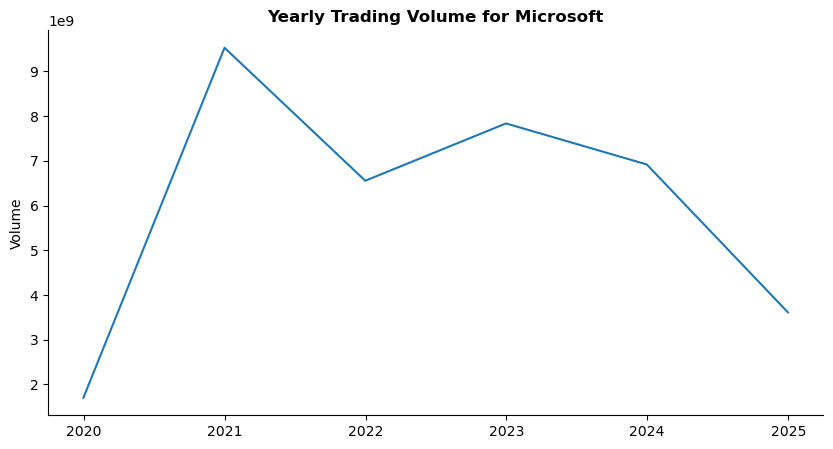

In [97]:
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(year_vol.index,  year_vol)
plt.title('Yearly Trading Volume for Microsoft', fontweight = 'bold')
ax.spines[['top', 'right']].set_visible(False)

plt.ylabel('Volume')
plt.show()


----
**Plot Description:**

Stock trading volumes peaked in 2021, indicating strong performance by Microsoft and the tech industry, likely driven by the COVID-19 pandemic and the surge in remote work, which increased the use of Microsoft products like Teams. 

Since 2023, trading volumes have declined despite rising stock prices. This decline could be due to investors holding onto their stocks for longer periods, possibly in response to worsening market conditions and rising inflation rates.

## Saving dataframe
----

In [99]:
msft_df.to_csv('../../data/msft_data.csv')